<a href="https://colab.research.google.com/github/sp2605-rose/shanmugapriya-.M/blob/main/sp_NM_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medica

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


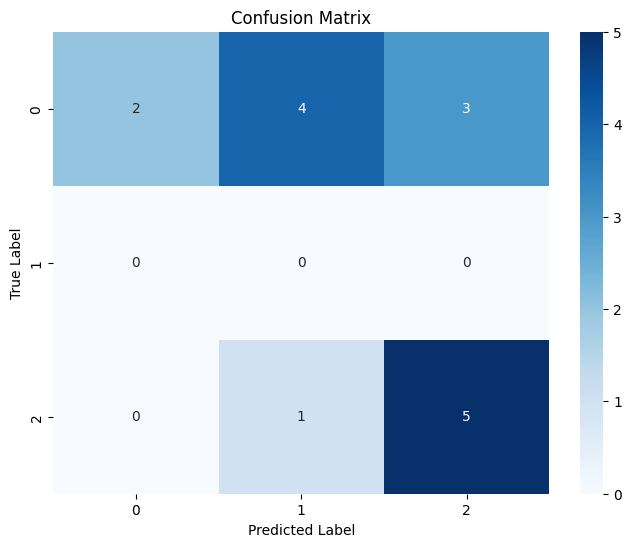

In [ ]:
!pip install gradio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('/content/healthBook1.csv')
    print("Dataset loaded successfully.")
    print(df.head())
    print(df.info())
except FileNotFoundError:
    print("Error: The file '/content/healthBook1.csv' was not found.")
    exit()

# Data Preprocessing.
df = df.dropna()
print("\nMissing values handled (rows with NaNs dropped).")

# Encode categorical features
# Identify categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print("\nCategorical columns:", categorical_cols)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print("\nCategorical columns encoded.")
print(df.head())

# Separate features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nData split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nFeatures scaled using StandardScaler.")

# Model Training
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("\nLogistic Regression model trained.")

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Logistic Regression model: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()